## Importing Libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import  confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import sklearn

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

%matplotlib inline

## Importing Dataset (Kaggle)

In [11]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Preprocessing

### Missing Values

<AxesSubplot:title={'center':'Missing Columns'}, ylabel='% missing'>

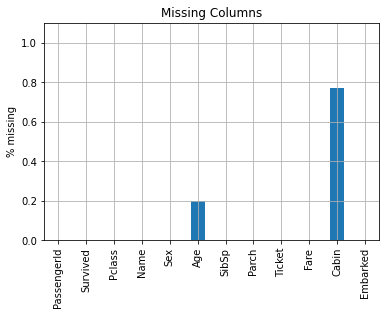

In [12]:
missing_percent = df.isna().sum(axis=0)
missing_percent = missing_percent/df.shape[0]
missing_percent.plot(kind='bar',
                     title = 'Missing Columns',
                     ylabel = '% missing',
                     ylim = (0,1.1),
                     grid = True)

In [13]:
df.columns = df.columns.str.lower()

In [14]:
df['age'].fillna(value=df['age'].mean() , inplace=True)
df['fare'].fillna(value=df['fare'].mean() , inplace=True)

In [15]:
df['cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

'cabin','boat','body','home_dest' has too many missing values to impute  
I will instead drop these columns

In [17]:
X = df.drop(columns=['cabin','survived','name','ticket'])
y = df['survived']
X.head()

,passengerid,pclass,sex,age,sibsp,parch,fare,embarked
0,1,3,male,22.0,1,0,7.2500,S
1,2,1,female,38.0,1,0,71.2833,C
2,3,3,female,26.0,0,0,7.9250,S
3,4,1,female,35.0,1,0,53.1000,S
4,5,3,male,35.0,0,0,8.0500,S


### Normalizing Data

#### Since GaussianNB expects data to be Normally Distributed, I will convert non-normal data to normal form 

In [18]:
nominal = ['sex','embarked']
ordinal = ['pclass']
numerical =  ['age','sibsp','parch','fare']

#### Distribution of Numerical Data

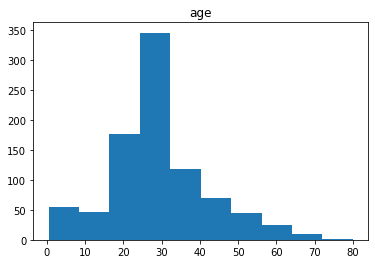

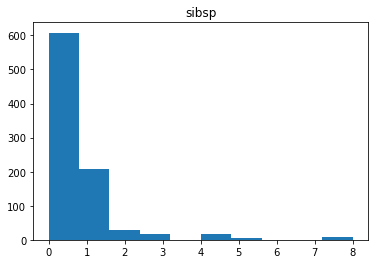

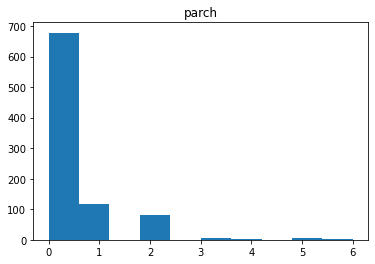

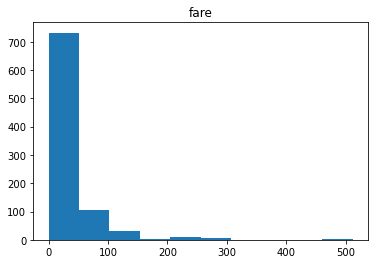

In [19]:
for i in df[numerical].columns:
    plt.hist(df[numerical][i] , bins= 10)
    plt.title(i)
    plt.show()

#### Using Log Scale to Normalize Data

In [20]:
df['sibsp'] = np.log(df['sibsp'].replace(0,0.000001))
df['parch'] = np.log(df['parch'].replace(0,0.000001))
df['fare'] = np.log(df['fare'].replace(0,0.000001))

## Train Test Split

In [21]:
X_train , X_test , y_train , y_test = train_test_split( X , y , test_size = 0.2 , random_state=42)

## Check if classes are balanced

<AxesSubplot:>

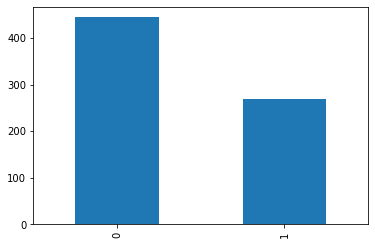

In [22]:
y_train.value_counts().plot(kind='bar')

- Classes are Balanced

### Create 3 pipelines for all 3 kinds of pipelines

In [23]:
ordinal_pipeline = Pipeline([
    ('imputer_o' , SimpleImputer(strategy='most_frequent')),
    ('encoder_o', OrdinalEncoder()) 
])

nominal_pipeline = Pipeline([
    ('imputer_n' , SimpleImputer(strategy='most_frequent')),
    ('encoder_n', OneHotEncoder(sparse=True, handle_unknown="ignore"))
])

numerical_pipeline = Pipeline([
    ('imputer_nu' , SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

### Transform the columns to Impute Missing Values and Encode Nominal & Numerical Values

In [24]:
preprocessing_pipeline = ColumnTransformer([
    ('nominal_preprocessor', nominal_pipeline, nominal),
    ('ordinal_preprocessor', ordinal_pipeline, ordinal),
    ('numerical_preprocessor', numerical_pipeline, numerical)
])

## Train 2 Different Models

### Gaussian Naive Bayes

In [25]:
gaussian_nb_pipeline = Pipeline([
    ('preprocessor', preprocessing_pipeline),
    ('GaussianNB',GaussianNB())
])

In [26]:
bernoulli_nb_pipeline = Pipeline([
    ('preprocessor', preprocessing_pipeline),
    ('GaussianNB',BernoulliNB())
])

#### Cross Validation

In [27]:
cross_val = KFold(n_splits = 10)
scores = cross_val_score(bernoulli_nb_pipeline, X = X_train , y = y_train , cv = cross_val)

In [28]:
scores

array([0.77777778, 0.75      , 0.71830986, 0.91549296, 0.8028169 ,
       0.73239437, 0.71830986, 0.77464789, 0.76056338, 0.90140845])

In [29]:
print("Bernoulli Naive Bayes Accuracy is {0:2.2f}%".format(scores.mean()*100))

Bernoulli Naive Bayes Accuracy is 78.52%


In [30]:
cross_val = KFold(n_splits = 10)
scores = cross_val_score(gaussian_nb_pipeline, X = X_train , y = y_train , cv = cross_val)

#### Accuracy Score

In [31]:
scores

array([0.84722222, 0.77777778, 0.70422535, 0.90140845, 0.83098592,
       0.77464789, 0.70422535, 0.77464789, 0.71830986, 0.90140845])

In [32]:
print("Gaussian Naive Bayes Accuracy is {0:2.2f}%".format(scores.mean()*100))

Gaussian Naive Bayes Accuracy is 79.35%


In [33]:
scores.mean()

0.7934859154929577

#### Confusion Matrix

In [34]:
model = gaussian_nb_pipeline.fit(X_train,y_train)
model.score(X_test,y_test)

model2 = bernoulli_nb_pipeline.fit(X_train,y_train)
model2.score(X_test,y_test)

0.7653631284916201

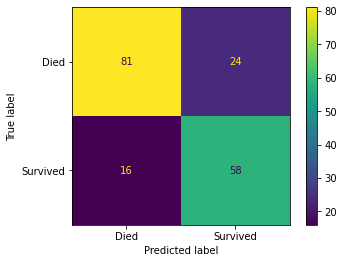

In [35]:
cm = confusion_matrix(y_true=y_test , y_pred=model.predict(X_test))
ConfusionMatrixDisplay(confusion_matrix=cm , display_labels=['Died','Survived']).plot()

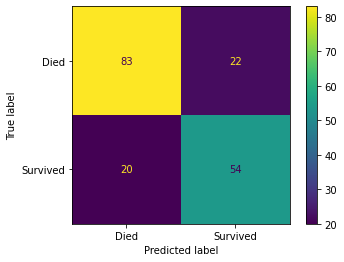

In [36]:
cm = confusion_matrix(y_true=y_test , y_pred=model2.predict(X_test))
ConfusionMatrixDisplay(confusion_matrix=cm , display_labels=['Died','Survived']).plot()

#### Accuracy Metrics

In [37]:
print(metrics.classification_report(y_test, y_pred = model.predict(X_test), labels = [0,1] , target_names=['Died','Survived']))

              precision    recall  f1-score   support

        Died       0.84      0.77      0.80       105
    Survived       0.71      0.78      0.74        74

    accuracy                           0.78       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.78      0.78      0.78       179



In [38]:
print(metrics.classification_report(y_test, y_pred = model2.predict(X_test), labels = [0,1] , target_names=['Died','Survived']))

              precision    recall  f1-score   support

        Died       0.81      0.79      0.80       105
    Survived       0.71      0.73      0.72        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



#### ROC Curve

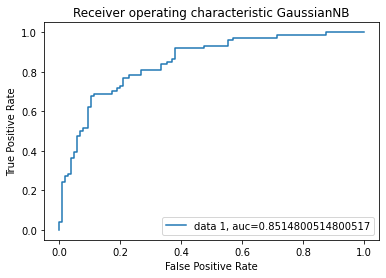

In [39]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

auc = roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize = (6,4))
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic GaussianNB')
plt.legend(loc="lower right")

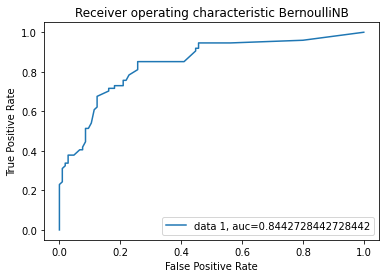

In [40]:
y_pred_proba = model2.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

auc = roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize = (6,4))
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic BernoulliNB')
plt.legend(loc="lower right")

### Inference
- we get an AUC = 0.8130 for GaussianNB which is slightly better than AUC = 0.8104 of BernoulliNB.  
- This means GaussianNB is a better classifier than BernoulliNB.  
- since the data is for training purposes, prioritising precision and recall would not make much sense
- No hyperparameters were tuned because of the simplicity of Naive Bayes algorithm so AUC of 0.80 is an acceptable model

In [42]:
df_test = pd.read_csv('test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [44]:
df_test.columns = df_test.columns.str.lower()

In [48]:
X_test = df_test.drop(columns=['cabin','name','ticket'])
X_test.head()

df_test['sibsp'] = np.log(df_test['sibsp'].replace(0,0.000001))
df_test['parch'] = np.log(df_test['parch'].replace(0,0.000001))
df_test['fare'] = np.log(df_test['fare'].replace(0,0.000001))

In [49]:
test_preds = gaussian_nb_pipeline.predict(X_test)

In [50]:
test_preds

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [54]:
test_preds = pd.DataFrame(test_preds)

In [55]:
test_preds.to_csv('test_preds.csv')